<a href="https://colab.research.google.com/github/RomaZhm/ColabNotes/blob/main/homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import log, exp, cos, sin

#Задача 1

(i)
1 + cos x = 0

In [ ]:
eps = 1e-7
x = 1
nit = 0
while True:
    xPrev = x
    x = xPrev + (cos(xPrev)+1)/sin(xPrev)
    nit += 1
    if (abs(x - xPrev) < eps or nit > 500):
        break
print(x, nit)

3.141592580278183 23


(ii) $x^2 = 2$

In [ ]:
eps = 1e-7
x = 1
nit = 0
while True:
    xPrev = x
    x = 1/2*(xPrev + 2/xPrev)
    nit += 1
    if (abs(x - xPrev) < eps or nit > 500):
        break
print(x, nit)

1.414213562373095 5


Для (i) сходимость линейная, для (ii) квадратичная

#Задание 2

Диагональное доминирование

In [ ]:
import numpy as np
eps = 1e-7
rnd = np.random.RandomState(1234)
n = 10
A = rnd.uniform(size = ( n , n )) + np . diag ([15]* n )
b = rnd.uniform ( size = n )
D = np.diag(np.diag(A))
B = np.linalg.inv(D)@(D - A)
c = np.linalg.inv(D)@b
print('Норма B:', np.linalg.norm(B))
x = b / np.amax(A)
nit = 0
while True:
    xPrev = x
    x = B@xPrev + c
    nit += 1
    if (np.linalg.norm(x - xPrev) < eps or nit > 500):
        break
print('Машинное решение:', np.linalg.solve(A, b),'Итерационное решение:', x, nit, sep = '\n')

Норма B: 0.36436161983015336
Машинное решение:
[ 0.03919429  0.03780037  0.04283232  0.02365951  0.05745031 -0.00030244
 -0.00577279  0.03177549 -0.00422849  0.05284648]
Итерационное решение:
[ 0.03919429  0.03780037  0.04283232  0.02365951  0.05745032 -0.00030243
 -0.00577279  0.0317755  -0.00422848  0.05284649]
12


Уменьшение диагонального доминирования (при d = 5 $B≈1$)

In [ ]:
import numpy as np
for d in [10.0, 5.0, 2.0]:
    eps = 1e-7
    rnd = np.random.RandomState(1234)
    n = 10
    A = rnd.uniform(size = ( n , n )) + np . diag ([d]* n )
    b = rnd.uniform ( size = n )
    D = np.diag(np.diag(A))
    B = np.linalg.inv(D)@(D - A)
    c = np.linalg.inv(D)@b
    print('Норма B:', np.linalg.norm(B))
    x = b / np.amax(A)
    nit = 0
    while True:
        xPrev = x
        x = B@xPrev + c
        nit += 1
        if (np.linalg.norm(x - xPrev) < eps or nit > 500):
            break
    print('Машинное решение:', np.linalg.solve(A, b),'Итерационное решение:', x, nit, sep = '\n')

Норма B: 0.5388887887486234
Машинное решение:
[ 0.05284585  0.05246763  0.05888502  0.02833247  0.08273644 -0.00508495
 -0.01278744  0.04385211 -0.01221715  0.07397915]
Итерационное решение:
[ 0.05284585  0.05246764  0.05888503  0.02833248  0.08273645 -0.00508494
 -0.01278744  0.04385211 -0.01221715  0.07397915]
18
Норма B: 1.0355299928250667
Машинное решение:
[ 0.08206499  0.0909377   0.09461125  0.02539011  0.15186887 -0.02661631
 -0.04365904  0.07261973 -0.04736649  0.12691694]
Итерационное решение:
[ 0.082065    0.09093772  0.09461126  0.02539013  0.15186888 -0.0266163
 -0.04365903  0.07261974 -0.04736648  0.12691695]
92
Норма B: 2.334809111760855
Машинное решение:
[ 0.12718784  0.22222949  0.13054953 -0.07483107  0.3383434  -0.10587593
 -0.18588081  0.13144464 -0.17431351  0.26225842]
Итерационное решение:
[-6.55425697e+138 -5.08479908e+138 -5.60523520e+138 -6.89118588e+138
 -2.98801620e+138 -4.28513942e+138 -3.30167707e+138 -3.83532658e+138
 -5.14834568e+138 -4.37911182e+138]
501

In [ ]:
def newton_iteration_t4(f, fder, x0, eps=1e-5, maxiter=100):
    x = x0
    niter = 0
    while True:
        xPrev = x
        x = xPrev - f(xPrev)/fder(xPrev)
        niter += 1
        if (abs(x - xPrev) < eps or niter > maxiter):
            break
    return x

In [ ]:
xx1 = newton_iteration_t4(lambda x: x**3 - 1, lambda x: 3.* x**2, x0 = complex(1,1))
xx2 = newton_iteration_t4(lambda x: x**3 - 1, lambda x: 3.* x**2, x0 = complex(-1,1))
xx3 = newton_iteration_t4(lambda x: x**3 - 1, lambda x: 3.* x**2, x0 = complex(-1,-1))
print(xx1, xx2, xx3)

(0.9999999999999994-4.556244651765188e-16j) (-0.4999999999999555+0.8660254037846933j) (-0.4999999999999555-0.8660254037846933j)


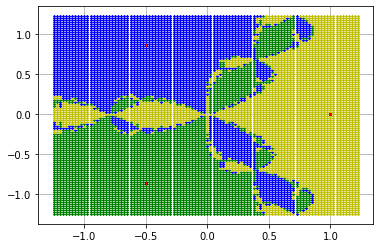

In [ ]:
import matplotlib.pyplot as plt
from math import sqrt
def distance(a, b):
  return sqrt((a.imag - b.imag)**2 + (a.real - b.real)**2)


for i in range(-50,50):
    for j in range(-50,50):
        if (i != 0 or j != 0):
            xx = newton_iteration_t4(lambda x: x**3 - 1, lambda x: 3.* x**2, x0 = complex(i/40, j/40))
            y,x = xx.imag, xx.real
            plt.plot(x,y,'.r',ms=1)
            if (distance(xx, xx1) < distance(xx1, xx2)/2 
                and distance(xx, xx1) < distance(xx1, xx3)/2):
                plt.plot(i/40,j/40,'*y',ms=2)
            if (distance(xx, xx2) < distance(xx2, xx1)/2 
                and distance(xx, xx2) < distance(xx2, xx3)/2):
                plt.plot(i/40,j/40,'*b',ms=2)
            if (distance(xx, xx3) < distance(xx3, xx2)/2 
                and distance(xx, xx3) < distance(xx3, xx1)/2):
                plt.plot(i/40,j/40,'*g',ms=2)
plt.grid() 
plt.show()